<a href="https://colab.research.google.com/github/ram30098singh/Deep-learning-and-NLP-/blob/main/Neural_network_to_predict_mobile_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Neural network to predict mobile weight

In [28]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [31]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/My Drive/deeplearning"

In [32]:
# 2.2 Full file path:
path = Path(pathToFolder) / "mobile_price.csv"

In [33]:
# 3.0 Read data
mobile_price = pd.read_csv(path)
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
# 3.1
mobile_price.shape
mobile_price.dtypes

(2000, 21)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [35]:
# 3.2 Get target and predictors:
y = mobile_price.pop("mobile_wt")
X = mobile_price

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# 4.0 Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# 4.1 Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
# 4.2 Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron

In [42]:
# 4.3 Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [43]:
# 4.4 Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 20020.9785
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 12292.1602
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 2330.7859
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1826.0454
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 1797.1212
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 1773.7701
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 1744.7749
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 1719.4176
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 1698.9794
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 1683.0636
Epoch 11/100
50/50 [==============================] - 0s 2ms/step - loss: 1657.7983
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 1637.7828

In [44]:
# 5.0 Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)

13/13 [==============================] - 0s 2ms/step - loss: 1376.7819
Mean Squared Error: 1376.7818603515625


In [45]:
# 5.1 Make predictions
predictions = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [46]:
# 5.2 Print sample predictions
for i in range(5):
    print('Actual:', y_test.values[i], 'Predicted:', predictions[i][0])

Actual: 200 Predicted: 150.5639
Actual: 138 Predicted: 145.33627
Actual: 196 Predicted: 134.86763
Actual: 166 Predicted: 157.6903
Actual: 130 Predicted: 149.26302


Text(0.5, 0, 'Sample')

Text(0, 0.5, 'mobile_wt')

Text(0.5, 1.0, 'Actual vs. Predicted mobile_wt')

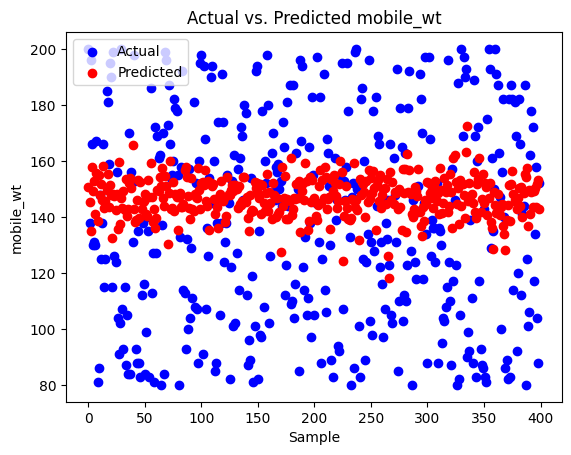

In [47]:
# 5.3
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('mobile_wt')
plt.title('Actual vs. Predicted mobile_wt')
plt.legend()
plt.show()


In [48]:
from tensorflow.keras.utils import plot_model

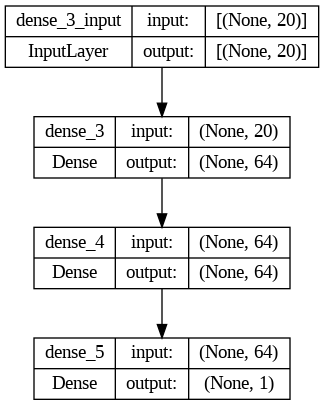

In [49]:
plot_model(model, show_shapes=True)

In [54]:
######### --------Done ---------------